# __Overview of the NASA Turbofan Jet Engine Data Set__
The NASA Turbofan Jet Engine dataset is designed to simulate the degradation of jet engines over time, with the goal of predicting the Remaining Useful Life (RUL) of each engine. This dataset was created by the Prognostics CoE at NASA Ames and is widely used in research and industry for developing predictive maintenance models.

## __Dataset Structure__
The dataset typically consists of multiple files corresponding to different conditions and scenarios. These files include:

### __Training Data (train_FD001.txt, train_FD002.txt, etc.):__

1. __Purpose:__ This data is used to train your predictive models.
2. __Content:__ It includes time-series data for multiple engines, recording various sensor readings at different time cycles until the engines fail.
3. __Columns:__

    - __Engine ID:__ Identifies each engine (unique for each engine).
    - __Cycle:__ The time cycle number, indicating the engine's operation stage.
    - __Operational Settings (3 columns):__ Different settings that influence the engine's performance, such as altitude, temperature, or power setting.
    - __Sensor Measurements (21 columns):__ Data from various sensors that monitor the engine's performance (e.g., temperature, pressure, vibration).
### __Test Data (test_FD001.txt, test_FD002.txt, etc.):__

1. __Purpose:__ Used for evaluating the model's performance.
2. __Content:__ Similar to the training data but the engines in this dataset have not failed by the end of the recorded cycles.
3. __Objective:__ Predict the RUL for these engines based on their current and past sensor readings.
### __RUL Data (RUL_FD001.txt, RUL_FD002.txt, etc.):__

1. __Purpose:__ Contains the actual Remaining Useful Life for each engine in the test set.
2. __Content:__ A single value for each engine, representing the number of cycles left before the engine fails.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
columns = ['engine_id', 'cycle'] + [f'operational_setting_{i}' for  i in range(1,4)] + [f'sensor_measurement_{i}' for i in range(1,22)]
train_data = pd.read_csv("data/train_FD001.txt", delim_whitespace=True, header=None, names=columns)
test_data = pd.read_csv("data/test_FD001.txt", delim_whitespace=True, header=None, names=columns)
rul_data = pd.read_csv("data/RUL_FD001.txt", delim_whitespace=True, header=None, names=["RUL"])
train_data.head()

,engine_id,cycle,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [6]:
print(train_data.isnull().sum())

engine_id                0
cycle                    0
operational_setting_1    0
operational_setting_2    0
operational_setting_3    0
sensor_measurement_1     0
sensor_measurement_2     0
sensor_measurement_3     0
sensor_measurement_4     0
sensor_measurement_5     0
sensor_measurement_6     0
sensor_measurement_7     0
sensor_measurement_8     0
sensor_measurement_9     0
sensor_measurement_10    0
sensor_measurement_11    0
sensor_measurement_12    0
sensor_measurement_13    0
sensor_measurement_14    0
sensor_measurement_15    0
sensor_measurement_16    0
sensor_measurement_17    0
sensor_measurement_18    0
sensor_measurement_19    0
sensor_measurement_20    0
sensor_measurement_21    0
dtype: int64


In [14]:
rul_train = train_data.groupby('engine_id')['cycle'].max().reset_index()
rul_train.columns = ['engine_id','max_cycle']
train_data = train_data.merge(rul_train, on=['engine_id'], how= 'left')
train_data['RUL'] = train_data['max_cycle'] - train_data['cycle']
train_data.drop('max_cycle', axis=1, inplace=True)

train_data.head()

,engine_id,cycle,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


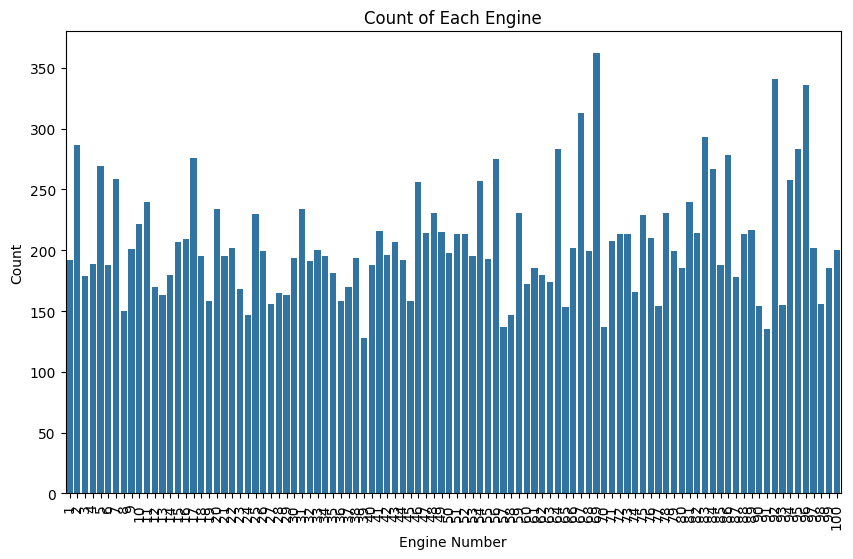

In [18]:
engine_counts = train_data['engine_id'].value_counts().reset_index()
engine_counts.columns = ['engine_id','count']
plt.figure(figsize=(10,6))
sns.barplot(x='engine_id',y='count',data=engine_counts)
plt.title('Count of Each Engine -train data-')
plt.xlabel('Engine Number')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


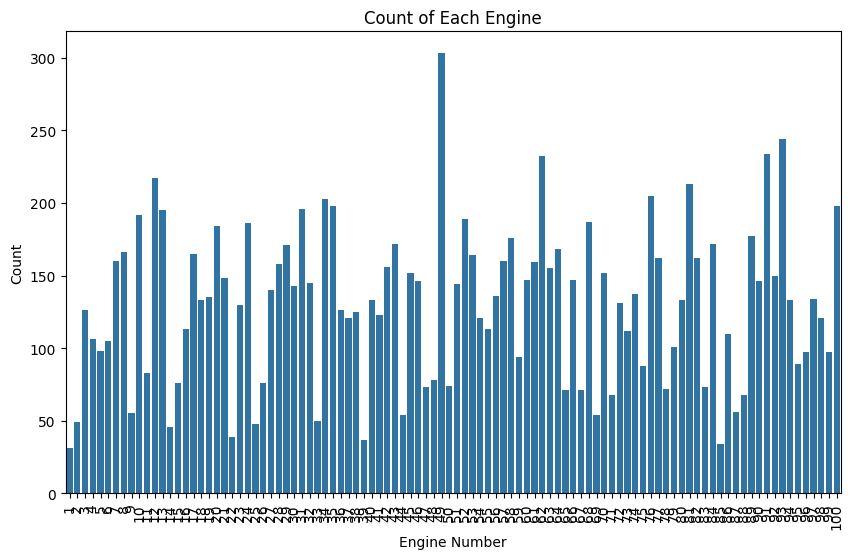

In [23]:
test_data.head()

engine_counts = test_data['engine_id'].value_counts().reset_index()
engine_counts.columns = ['engine_id','count']

plt.figure(figsize=(10,6))
sns.barplot(x='engine_id',y='count',data=engine_counts)
plt.title('Count of Each Engine -test data-')
plt.xlabel('Engine Number')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


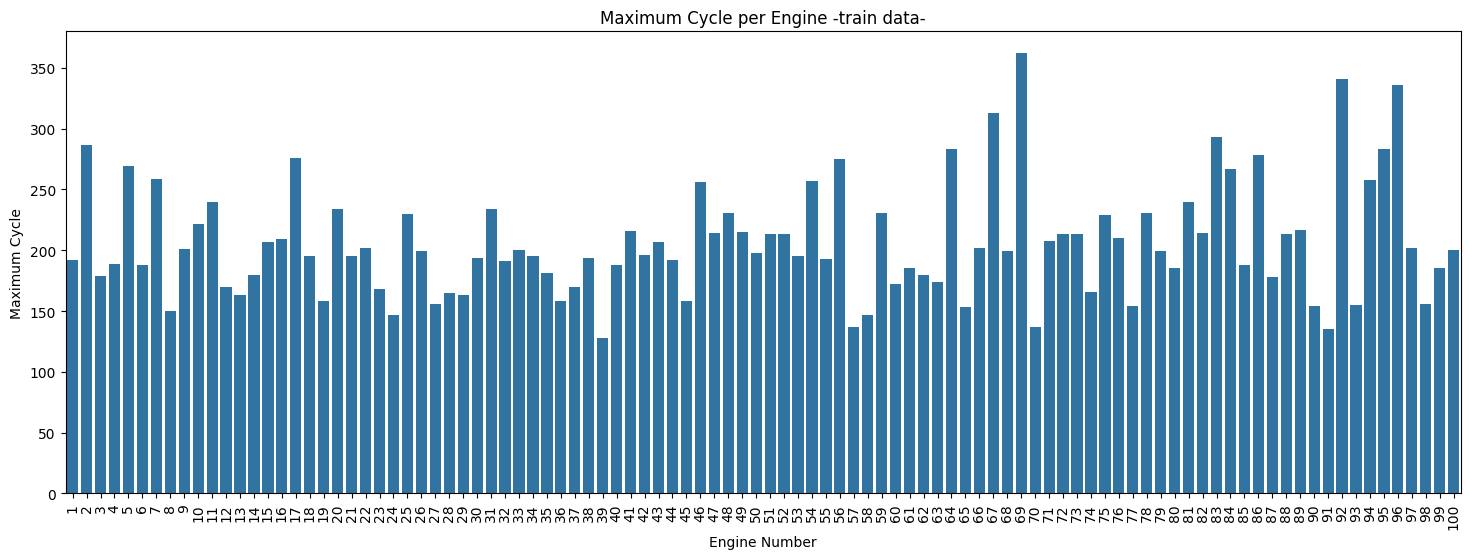

In [29]:
max_cycle = train_data.groupby('engine_id')['cycle'].max().reset_index()
max_cycle.columns = ['engine_id','max_cycle']

max_cycle.head()
plt.figure(figsize=(18, 6))
sns.barplot(x="engine_id",y='max_cycle',data=max_cycle)
plt.title('Maximum Cycle per Engine -train data-')
plt.xlabel('Engine Number')
plt.ylabel('Maximum Cycle')
plt.xticks(rotation=90)
plt.show()

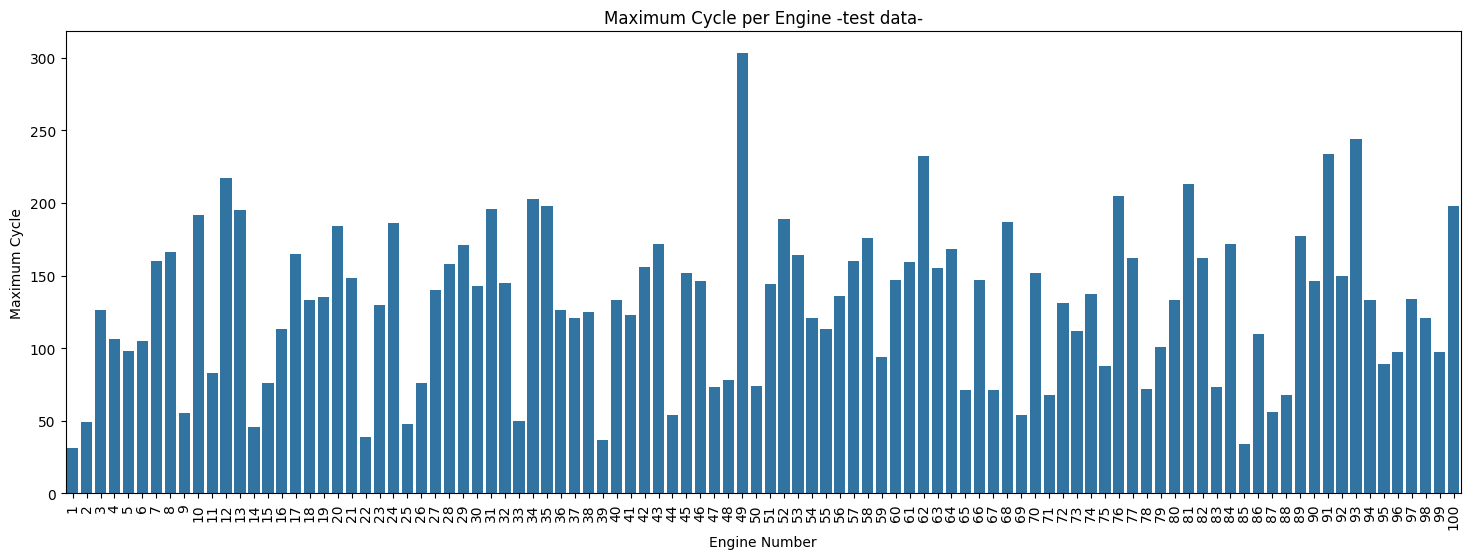

In [30]:
max_cycle = test_data.groupby('engine_id')['cycle'].max().reset_index()
max_cycle.columns = ['engine_id','max_cycle']

max_cycle.head()
plt.figure(figsize=(18, 6))
sns.barplot(x="engine_id",y='max_cycle',data=max_cycle)
plt.title('Maximum Cycle per Engine -test data-')
plt.xlabel('Engine Number')
plt.ylabel('Maximum Cycle')
plt.xticks(rotation=90)
plt.show()

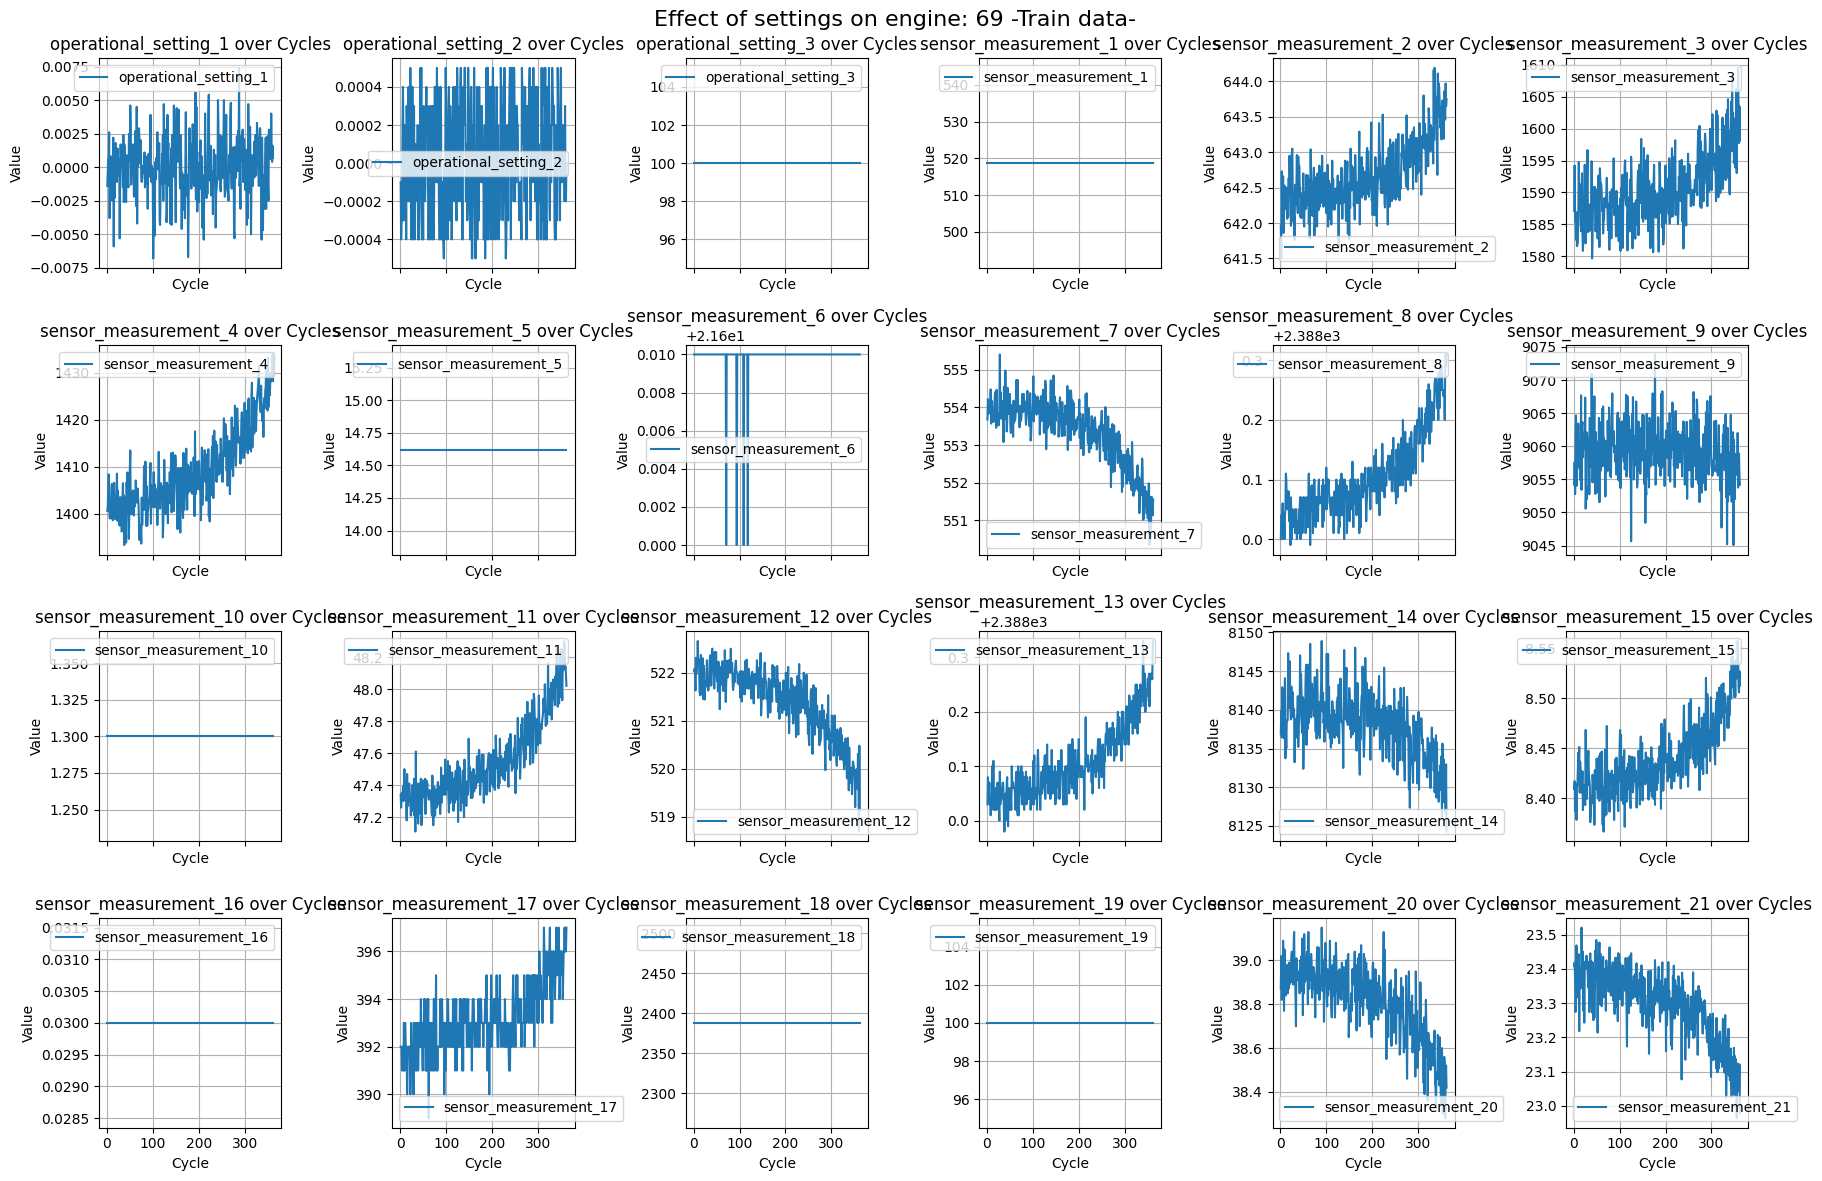

In [44]:
engine_number  = 69
engine_data = train_data[train_data['engine_id']==engine_number]

columns_to_plot = [f'operational_setting_{i}' for  i in range(1,4)] + [f'sensor_measurement_{i}' for i in range(1,22)]
num_cols = 6
num_rows = (len(columns_to_plot)  // num_cols)

fig,axes = plt.subplots(num_rows,num_cols,figsize=(18, num_rows * 3), sharex=True)

for ax, column in zip(axes.flatten(), columns_to_plot):
    ax.plot(engine_data['cycle'], engine_data[column], label=column)
    ax.set_title(f'{column} over Cycles')
    ax.set_xlabel('Cycle')
    ax.set_ylabel('Value')
    ax.legend()
    ax.grid(True)

# Adjust the layout so that subgraphs do not overlap
plt.suptitle(f"Effect of settings on engine: {engine_number} -Train data-",fontsize=16)
plt.tight_layout()
plt.show()



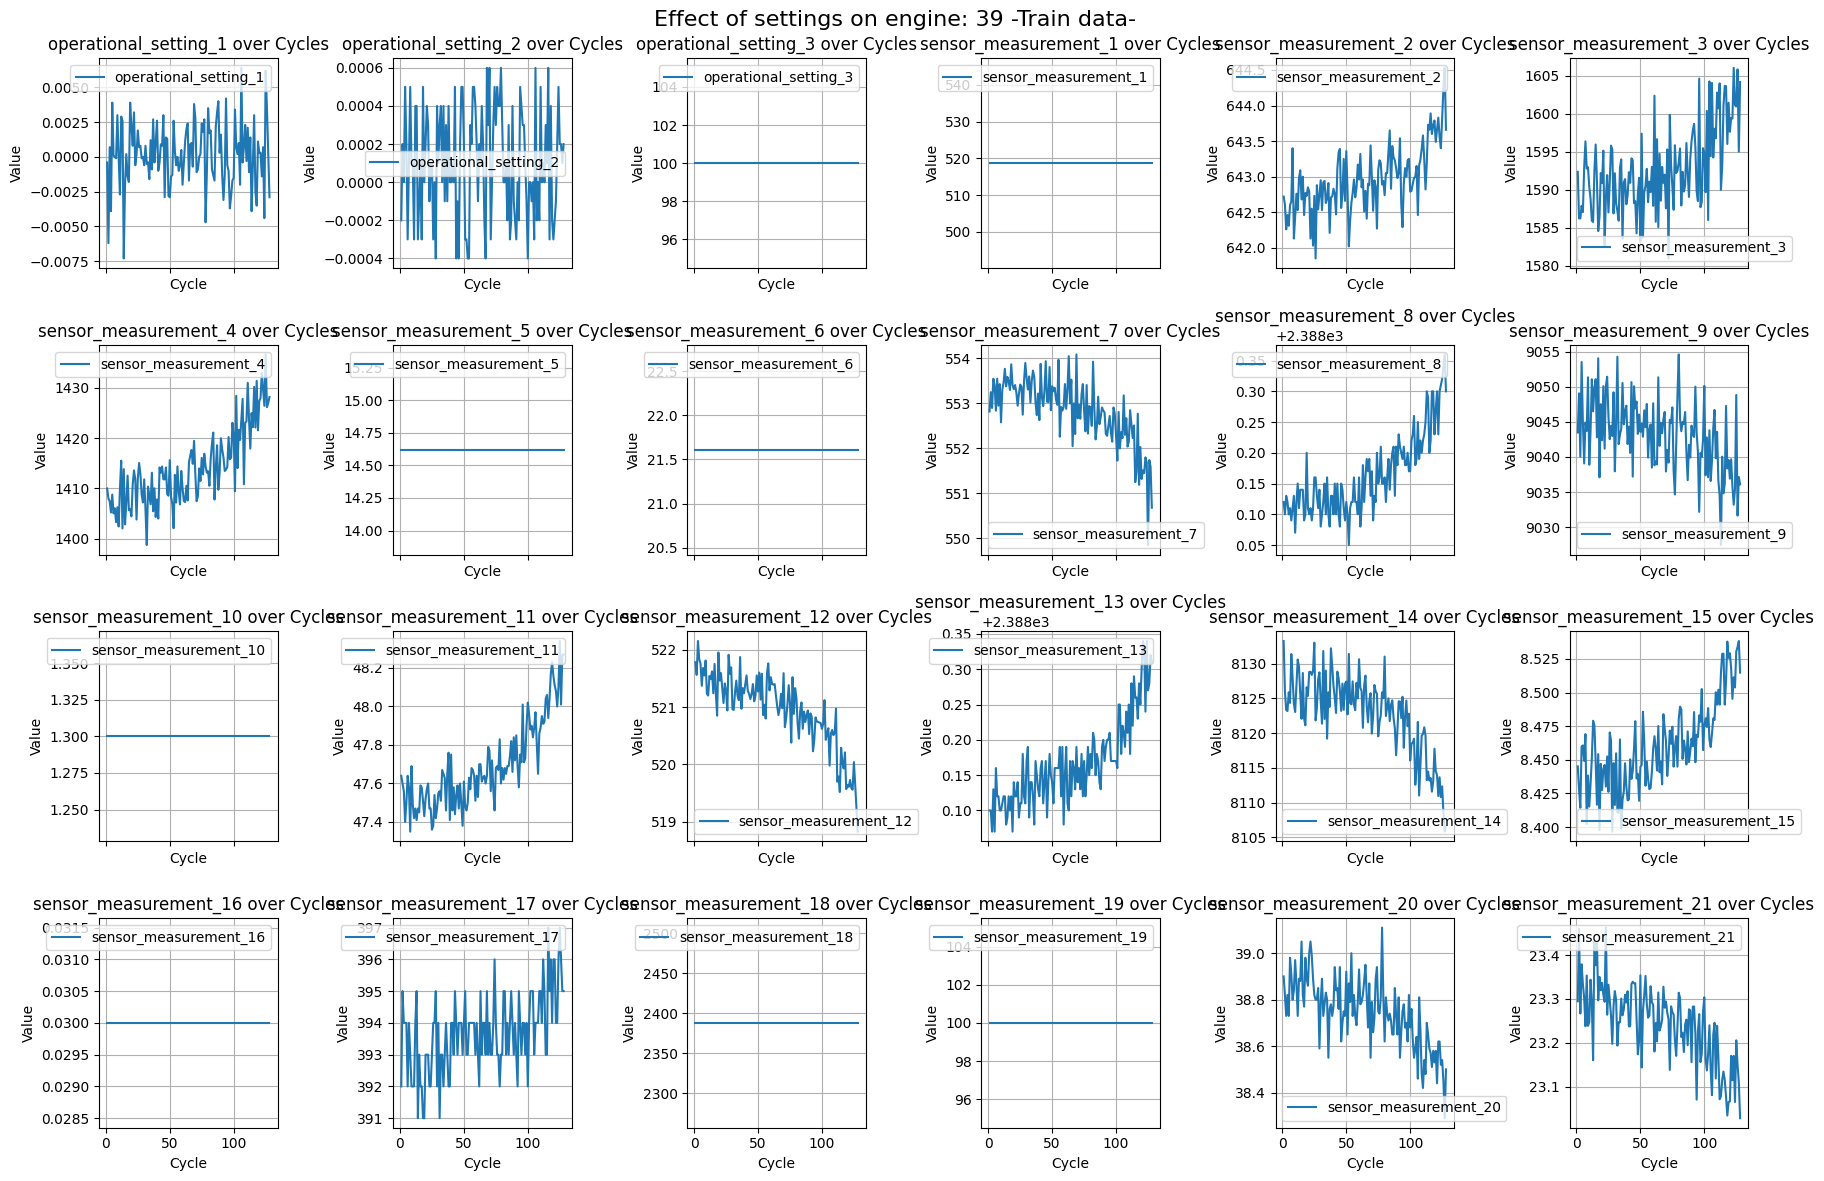

In [46]:
engine_number  = 39
engine_data = train_data[train_data['engine_id']==engine_number]

columns_to_plot = [f'operational_setting_{i}' for  i in range(1,4)] + [f'sensor_measurement_{i}' for i in range(1,22)]
num_cols = 6
num_rows = (len(columns_to_plot)  // num_cols)

fig,axes = plt.subplots(num_rows,num_cols,figsize=(18, num_rows * 3), sharex=True)

for ax, column in zip(axes.flatten(), columns_to_plot):
    ax.plot(engine_data['cycle'], engine_data[column], label=column)
    ax.set_title(f'{column} over Cycles')
    ax.set_xlabel('Cycle')
    ax.set_ylabel('Value')
    ax.legend()
    ax.grid(True)

# Adjust the layout so that subgraphs do not overlap
plt.suptitle(f"Effect of settings on engine: {engine_number} -Train data-",fontsize=16)
plt.tight_layout()
plt.show()

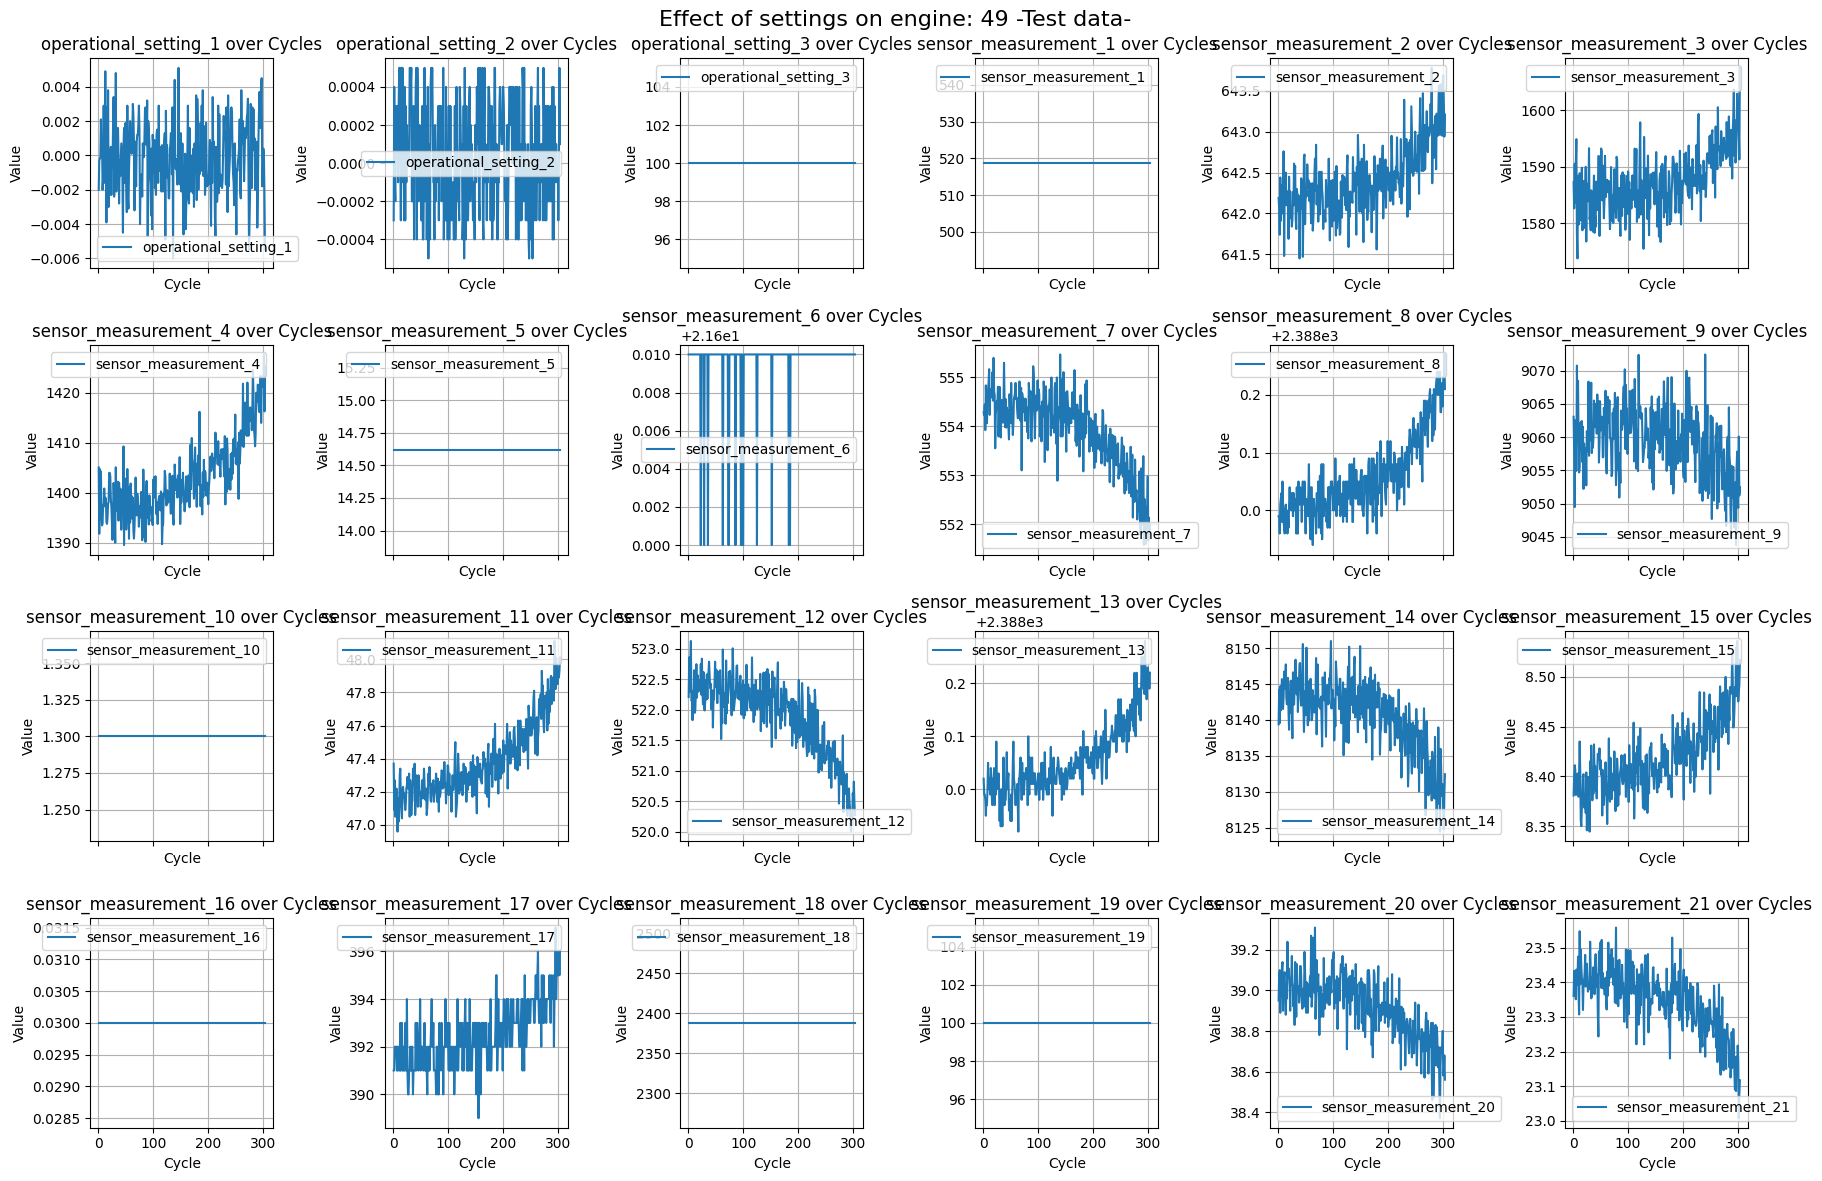

In [45]:
engine_number  = 49
engine_data = test_data[test_data['engine_id']==engine_number]

columns_to_plot = [f'operational_setting_{i}' for  i in range(1,4)] + [f'sensor_measurement_{i}' for i in range(1,22)]
num_cols = 6
num_rows = (len(columns_to_plot)  // num_cols)

fig,axes = plt.subplots(num_rows,num_cols,figsize=(18, num_rows * 3), sharex=True)

for ax, column in zip(axes.flatten(), columns_to_plot):
    ax.plot(engine_data['cycle'], engine_data[column], label=column)
    ax.set_title(f'{column} over Cycles')
    ax.set_xlabel('Cycle')
    ax.set_ylabel('Value')
    ax.legend()
    ax.grid(True)

# Adjust the layout so that subgraphs do not overlap
plt.suptitle(f"Effect of settings on engine: {engine_number} -Test data-",fontsize=16)
plt.tight_layout()
plt.show()


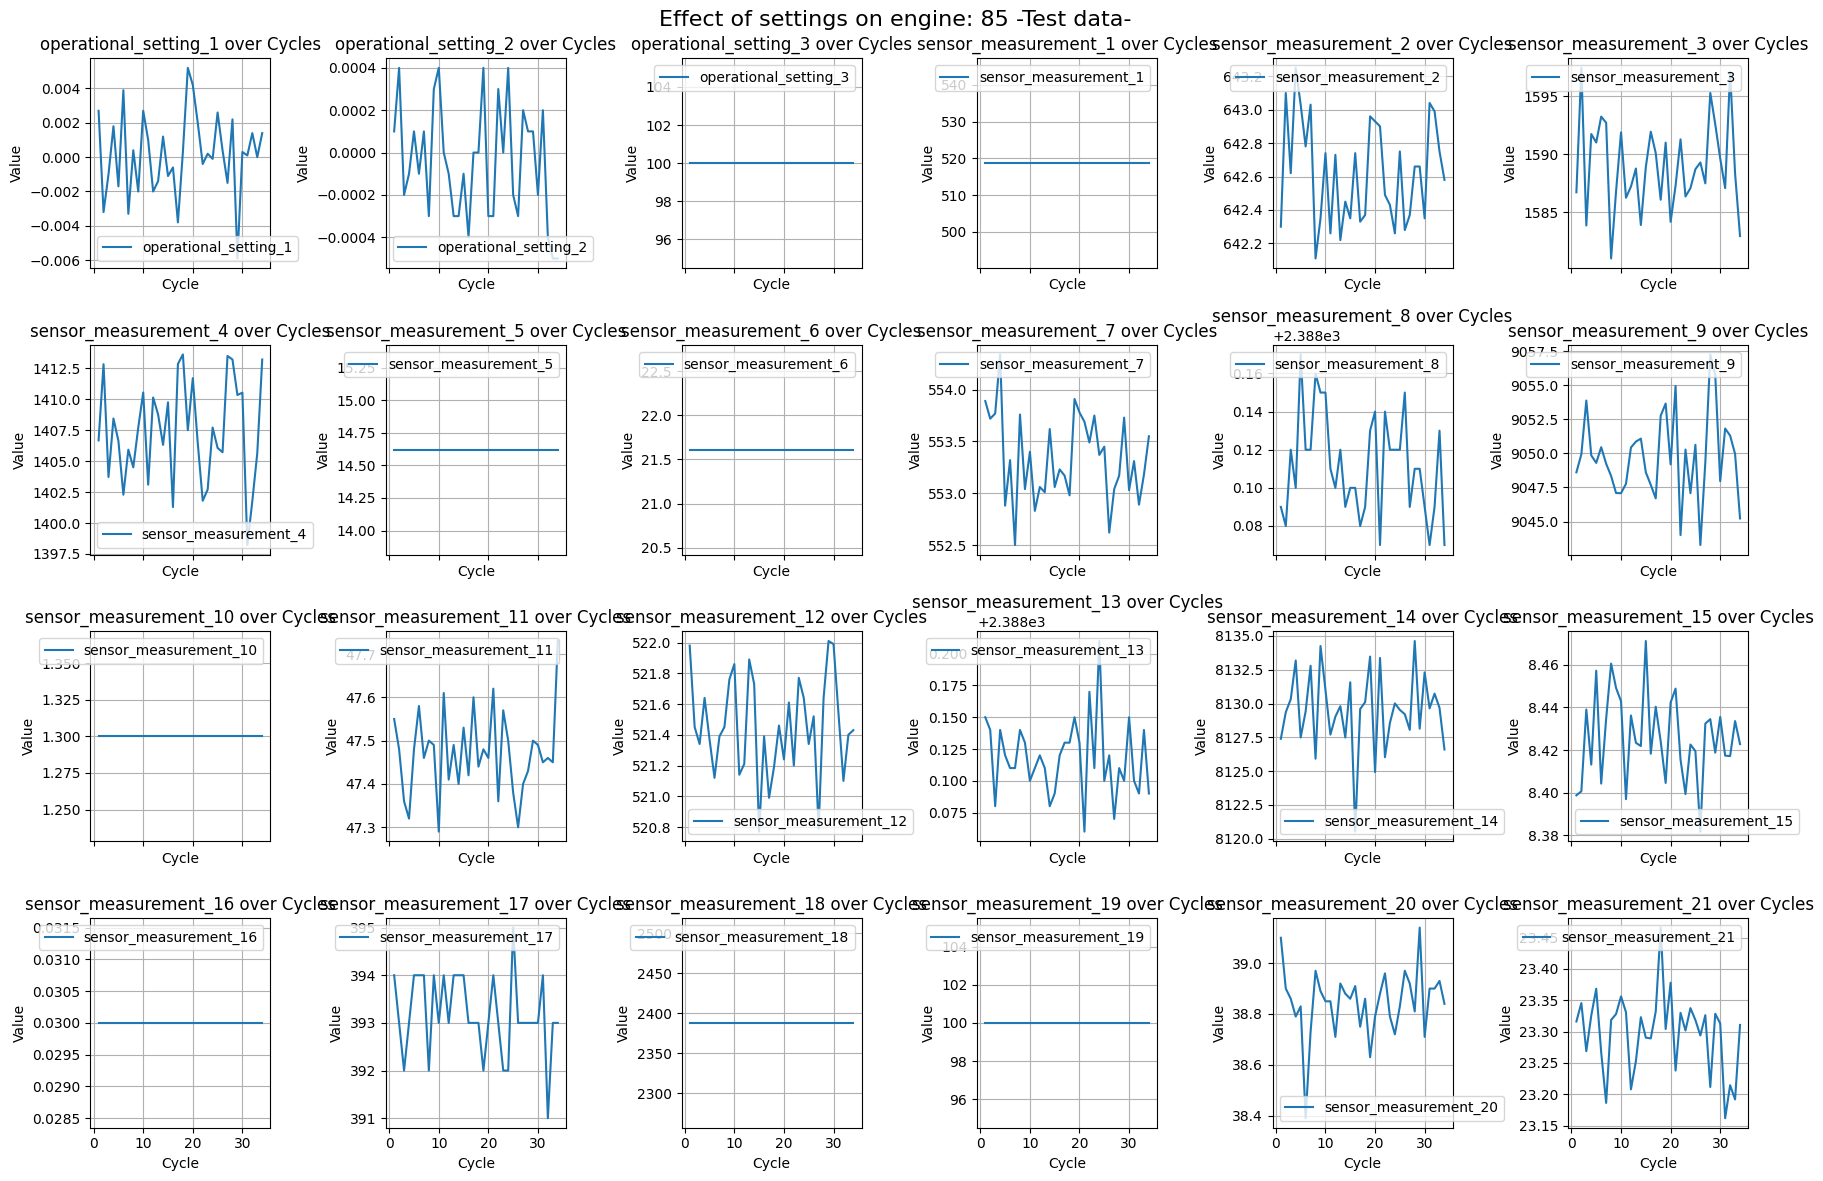

In [47]:
engine_number  = 85
engine_data = test_data[test_data['engine_id']==engine_number]

columns_to_plot = [f'operational_setting_{i}' for  i in range(1,4)] + [f'sensor_measurement_{i}' for i in range(1,22)]
num_cols = 6
num_rows = (len(columns_to_plot)  // num_cols)

fig,axes = plt.subplots(num_rows,num_cols,figsize=(18, num_rows * 3), sharex=True)

for ax, column in zip(axes.flatten(), columns_to_plot):
    ax.plot(engine_data['cycle'], engine_data[column], label=column)
    ax.set_title(f'{column} over Cycles')
    ax.set_xlabel('Cycle')
    ax.set_ylabel('Value')
    ax.legend()
    ax.grid(True)

# Adjust the layout so that subgraphs do not overlap
plt.suptitle(f"Effect of settings on engine: {engine_number} -Test data-",fontsize=16)
plt.tight_layout()
plt.show()